# Import packages   

In [31]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import re
import sklearn
import scipy as sp
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, log_loss

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook

In [2]:
# Acquire Training Data and Test Data
raw_data = pd.read_csv('../Titanic/train.csv')
validation_set = pd.read_csv('../Titanic/test.csv')
combo = [raw_data, validation_set]

# Explore the data

In [4]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
raw_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
108,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S
602,603,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.4000,NaN,S
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0000,NaN,S
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q
833,834,0,3,"Augustsson, Mr. Albert",male,23.0,0,0,347468,7.8542,NaN,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# numerical predictors summary
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# categorical predictors summary
raw_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mellinger, Miss. Madeleine Violet",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


# Visualize Data

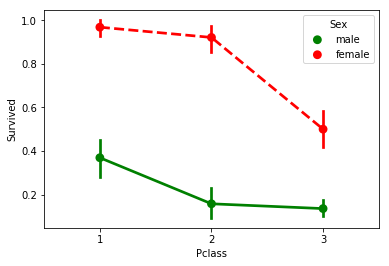

In [51]:
# Pclass vs Survival\n",
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=raw_data,
    palette={"male": "green", "female": "red"}, linestyles=["-", "--"]);

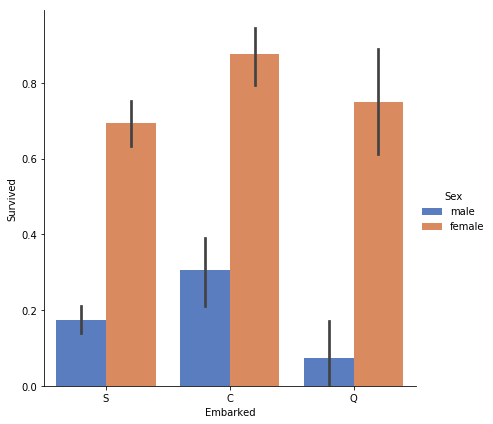

In [52]:
# Embarked vs survival"
sns.catplot(x="Embarked", y="Survived", hue="Sex", data=raw_data,
    height=6, kind="bar", palette="muted");

In [24]:
#pd.get_dummies(raw_data['Pclass'])

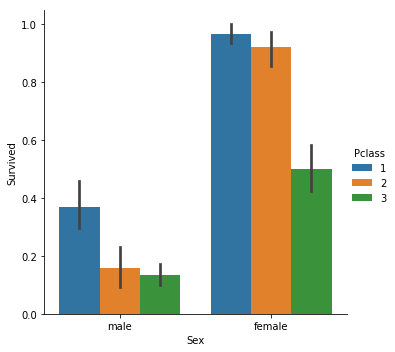

In [23]:
# sex vs survival\n",
sns.catplot(x="Sex", y="Survived", hue='Pclass', kind="bar", data=raw_data);

In [7]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
      
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 },
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
      
    plt.title('Pearson Correlation of Features', y=1.05, size=15)  

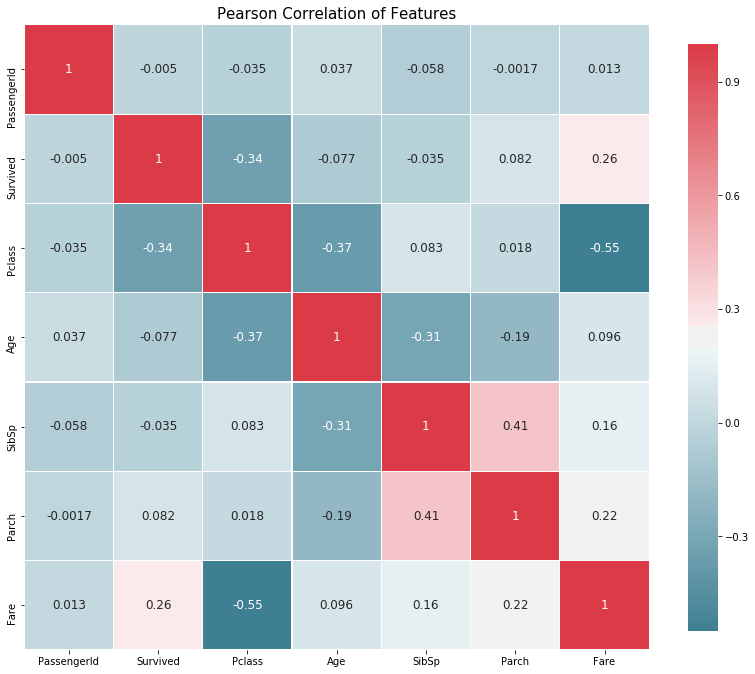

In [30]:
correlation_heatmap(raw_data)

# Data Cleaning
* Check for missing values

In [35]:
raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
validation_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Complete missing values in the raw data set and validation data set

In [8]:
for dataset in combo:   
    #complete missing age with median\n",
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode\n",
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

     #complete missing fare with median\n",
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

## Drop useless columns
* Since ticket, PassengerID have no use for predicton, we will drop these two columns
* Cabin has too many missing values, we also drop this column

In [9]:
drop_column = ['PassengerId','Ticket','Cabin']
raw_data.drop(drop_column, axis=1, inplace = True)

In [40]:
# double check after filling NAs\n",
print(raw_data.isnull().sum())
print("-"*10)
print(validation_set.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


## Feature Engineering
* create new features: FamilySize, IsAlone, Title
* crate bins for Age and Fare

In [10]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in combo:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1
    
    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    # now update to no/0 if family size is greater than 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 
    
    
    #quick and dirty code split title from name
    dataset['Title'] = dataset['Name'].str.split(",",expand=True)[1].str.split(".", expand=True)[0]
    
    #Continuous variable bins
        
    #Fare Bins/Buckets using qcut or frequency bins
    dataset['FareBin'] = pd.qcut(dataset['Fare'],5)
    
    #Age Bins/Buckets using cut or value bins
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

In [47]:
print(raw_data['Title'].value_counts())

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 Jonkheer          1
 Ms                1
 Lady              1
 the Countess      1
 Mme               1
 Don               1
 Capt              1
 Sir               1
Name: Title, dtype: int64


In [11]:
#cleanup rare title names\n",
    
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics\n",
title_names = (raw_data['Title'].value_counts() < stat_min) 
#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code\n",
raw_data['Title'] = raw_data['Title'].apply(lambda x: 'Other' if title_names.loc[x] == True else x)
print(raw_data['Title'].value_counts())

 Mr        517
 Miss      182
 Mrs       125
 Master     40
Other       27
Name: Title, dtype: int64


## More Data Visualization

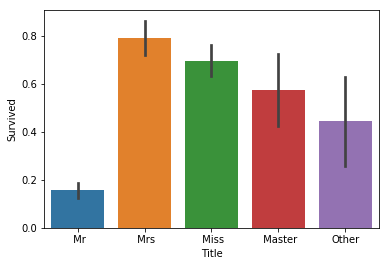

In [50]:
# Title vs survival\n",
sns.barplot(x="Title", y="Survived", data=raw_data);

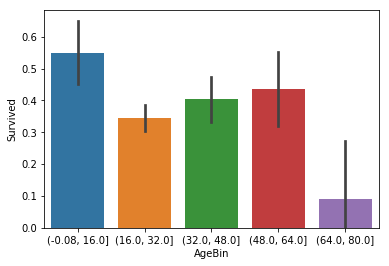

In [53]:
# Agebin vs Survival
sns.barplot(x="AgeBin", y="Survived", data=raw_data);

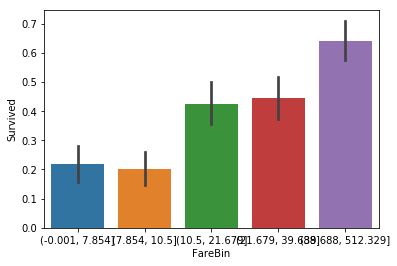

In [54]:
# Farebin vs Survival\n",
sns.barplot(x="FareBin", y="Survived", data=raw_data);

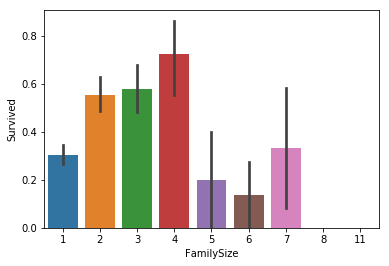

In [55]:
# FamilySize vs Survival\n",
sns.barplot(x="FamilySize", y="Survived", data=raw_data);

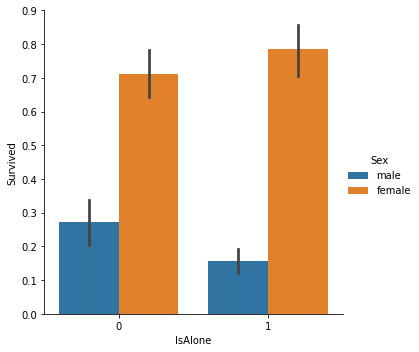

In [60]:
# IsAlone vs Survival\n",
sns.catplot(x="IsAlone", y="Survived", hue='Sex', kind='bar',data=raw_data);

## Convert categorical data to dummy variables

In [12]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset
#code categorical data
label = preprocessing.LabelEncoder()
for dataset in combo:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [64]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null category
AgeBin           891 non-null category
Sex_Code         891 non-null int64
Embarked_Code    891 non-null int64
Title_Code       891 non-null int64
AgeBin_Code      891 non-null int64
FareBin_Code     891 non-null int64
dtypes: category(2), float64(2), int64(11), object(4)
memory usage: 120.3+ KB


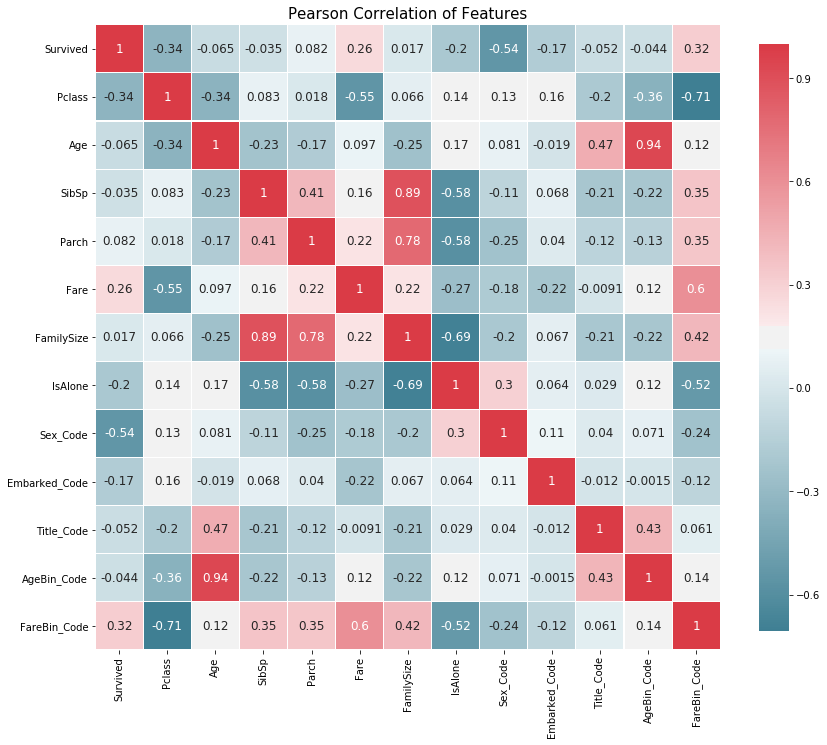

In [66]:
correlation_heatmap(raw_data)

## Feature Selection
* Observed from the correlation matrix, we will have a set of predictors as below:

In [13]:
x = ['Pclass','AgeBin_Code', 'Title_Code','Fare','Sex_Code','Age','SibSp','Parch','IsAlone', 'FareBin_Code', 'Embarked_Code','FamilySize']
y = ['Survived']
xy =  y + x

In [69]:
raw_data[xy].sample(10)

,Survived,Pclass,Title_Code,Sex_Code,Age,SibSp,Parch,IsAlone,FareBin_Code,Embarked_Code
231,0,3,2,1,29.0,0,0,1,0,2
373,0,1,2,1,22.0,0,0,1,4,0
178,0,2,2,1,30.0,0,0,1,2,2
876,0,3,2,1,20.0,0,0,1,1,2
606,0,3,2,1,30.0,0,0,1,1,2
330,1,3,1,0,28.0,2,0,0,3,1
281,0,3,2,1,28.0,0,0,1,0,2
275,1,1,1,0,63.0,1,0,0,4,2
350,0,3,2,1,23.0,0,0,1,1,2
228,0,2,2,1,18.0,0,0,1,2,2


# Data Modeling
## Split into train set and test set

In [14]:
train_x, test_x, train_y, test_y = sklearn.model_selection.train_test_split(raw_data[x], raw_data[y], random_state = 0)

In [15]:
## Confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    #This function prints and plots the confusion matrix.
    #Normalization can be applied by setting `normalize=True`.
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Algorithm 1: Naive Bayes

In [60]:
gaussian = GaussianNB()
gaussian.fit(train_x, train_y)
 

GaussianNB(priors=None, var_smoothing=1e-09)

Confusion matrix, without normalization
[[103  36]
 [ 14  70]]


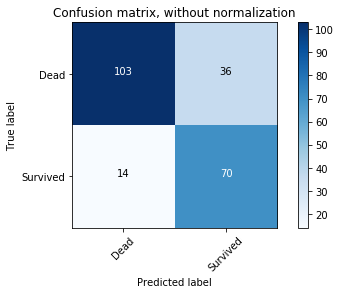

In [61]:
# Compute confusion matrix\n",
cnf_matrix = confusion_matrix(test_y['Survived'], gaussian.predict(test_x))
np.set_printoptions(precision=2)
class_names = ['Dead', 'Survived']
# Plot non-normalized confusion matrix\n",
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [62]:
## Accuracy for NB on test set
print(classification_report(test_y['Survived'], gaussian.predict(test_x)))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80       139
           1       0.66      0.83      0.74        84

   micro avg       0.78      0.78      0.78       223
   macro avg       0.77      0.79      0.77       223
weighted avg       0.80      0.78      0.78       223



In [63]:
accuracy_score(test_y['Survived'], gaussian.predict(test_x))

0.7757847533632287

In [81]:
## Validate with 10 fold Cross Validation

In [101]:
cv_score = cross_val_score(gaussian, train_x, train_y, cv = 10, scoring='accuracy')
cv_score.mean()

0.7936001809136137

## Algorithm 2: Multiple Layer Perceptrons

* Without tuning parameters

In [102]:
mlp = MLPClassifier()
mlp.fit(train_x, train_y)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Confusion matrix, without normalization
[[115  24]
 [ 19  65]]


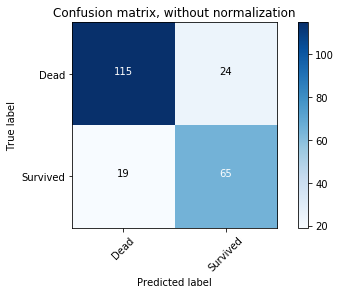

In [103]:
cnf_matrix = confusion_matrix(test_y['Survived'], mlp.predict(test_x))
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']
# Plot non-normalized confusion matrix\n",
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
title='Confusion matrix, without normalization')

In [104]:
print(classification_report(test_y['Survived'], mlp.predict(test_x)))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       139
           1       0.73      0.77      0.75        84

   micro avg       0.81      0.81      0.81       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [105]:
accuracy_score(test_y['Survived'], mlp.predict(test_x))

0.8071748878923767

In [108]:
cv_score = cross_val_score(mlp, train_x, train_y, cv = 10, scoring='accuracy')
cv_score.mean()

0.6991632745364088

* Tuning parameters for Multiple Layer Perceptron

In [109]:

parameter_space = {
        'hidden_layer_sizes': [(10,10,10), (20,20,20), (30,10,20)],
        'activation': ['tanh', 'relu','logistic'],
        'solver': ['lbfgs','sgd', 'adam'],
         'alpha': [0.0001, 0.05,1e-05],
        'learning_rate': ['constant','adaptive'],
    }
mlp = MLPClassifier(
                  max_iter=300, momentum=0.9, n_iter_no_change=10,
                  nesterovs_momentum=True, power_t=0.5,  random_state=1,
                  shuffle=True, tol=0.0001,
                  validation_fraction=0.1, verbose=False, warm_start=False)

In [110]:
clf = GridSearchCV(mlp, parameter_space, scoring = 'accuracy', cv=3)

In [111]:
clf.fit(train_x, train_y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layer_sizes': [(10, 10, 10), (20, 20, 20), (30, 10, 20)], 'activation': ['tanh', 'relu', 'logistic'], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.0001, 0.05, 1e-05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [112]:
# Best paramete set\n",
print('Best parameters found:\\n', clf.best_params_)

Best parameters found:\n {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'constant', 'solver': 'lbfgs'}


In [113]:
print(classification_report(test_y['Survived'], clf.predict(test_x)))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       139
           1       0.74      0.74      0.74        84

   micro avg       0.80      0.80      0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [64]:
accuracy_score(test_y['Survived'], clf.predict(test_x))

NameError: name 'clf' is not defined

Confusion matrix, without normalization
[[117  22]
 [ 22  62]]


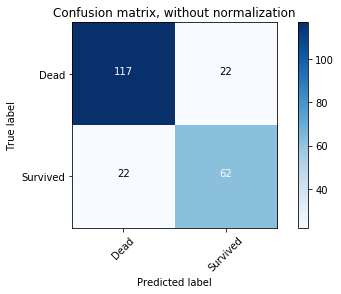

In [115]:
cnf_matrix = confusion_matrix(test_y['Survived'], clf.predict(test_x))
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']
# Plot non-normalized confusion matrix\n",
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
title='Confusion matrix, without normalization')

## Algorithm 3:  XGBoost Classifier


In [116]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(train_x, train_y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [117]:
print(classification_report(test_y['Survived'], xgb.predict(test_x)))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       139
           1       0.86      0.74      0.79        84

   micro avg       0.86      0.86      0.86       223
   macro avg       0.86      0.83      0.84       223
weighted avg       0.86      0.86      0.85       223



In [118]:
accuracy_score(test_y['Survived'], xgb.predict(test_x))

0.8565022421524664

Confusion matrix, without normalization
[[129  10]
 [ 22  62]]


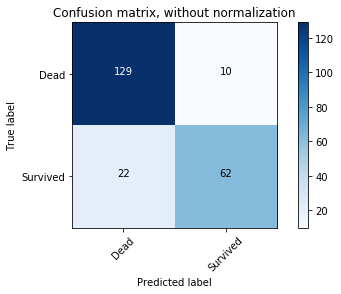

In [119]:
cnf_matrix = confusion_matrix(test_y['Survived'], xgb.predict(test_x))
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']
# Plot non-normalized confusion matrix\n",
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
title='Confusion matrix, without normalization')

In [120]:
cv_score = cross_val_score(xgb, train_x, train_y, cv = 10, scoring='accuracy')
cv_score.mean()

0.8264812302125735

* Tuning parameters for XGBoost

In [51]:
parameter_space = {'learning_rate': [.01, .03, .05, .1, .25], #default: .3\n",
 'max_depth': [1,2,3,4,5,6,7],
 'n_estimators': [10, 50, 100, 300]}
xgb = XGBClassifier(objective='binary:logistic', 
                      reg_alpha = 0.3)


In [52]:
xgb_tuned = GridSearchCV(xgb, parameter_space, scoring = 'accuracy', cv=3)

In [53]:
xgb_tuned.fit(train_x, train_y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.25], 'max_depth': [1, 2, 3, 4, 5, 6, 7], 'n_estimators': [10, 50, 100, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [55]:
xgb_tuned.best_params_

{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 50}

In [56]:
print(classification_report(test_y['Survived'], xgb_tuned.predict(test_x)))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       139
           1       0.82      0.71      0.76        84

   micro avg       0.83      0.83      0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



In [65]:
accuracy_score(test_y['Survived'], xgb_tuned.predict(test_x))

0.8340807174887892

Confusion matrix, without normalization
[[126  13]
 [ 24  60]]


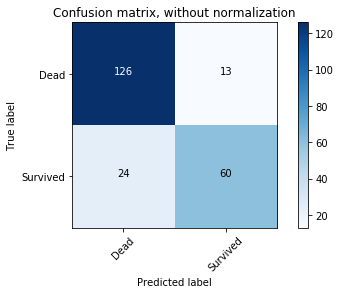

In [58]:
cnf_matrix = confusion_matrix(test_y['Survived'], xgb_tuned.predict(test_x))
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']
# Plot non-normalized confusion matrix\n",
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
title='Confusion matrix, without normalization')

## Algorithm 4: SVM

In [19]:

svc = SVC()

svc.fit(train_x, train_y)



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Confusion matrix, without normalization
[[111  28]
 [ 30  54]]


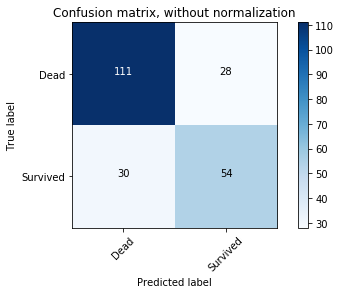

In [20]:
cnf_matrix = confusion_matrix(test_y['Survived'], svc.predict(test_x))
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']
# Plot non-normalized confusion matrix\n",
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
title='Confusion matrix, without normalization')

In [21]:
print(classification_report(test_y['Survived'], svc.predict(test_x)))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       139
           1       0.66      0.64      0.65        84

   micro avg       0.74      0.74      0.74       223
   macro avg       0.72      0.72      0.72       223
weighted avg       0.74      0.74      0.74       223



In [22]:
cv_score = cross_val_score(svc, train_x, train_y, cv = 10, scoring='accuracy')
cv_score.mean()

0.7141338760741746

In [24]:
# tuning parameters for SVM
parameter_space = {
           
            'C': [1,2,3,4,5], #default=1.0
            'gamma': [.1, .25, .5, .75, 1.0], #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True]
          
             }
svc = SVC()
svm_tuned = GridSearchCV(svc, parameter_space, scoring = 'accuracy', cv=3)

In [25]:
svm_tuned.fit(train_x, train_y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 2, 3, 4, 5], 'gamma': [0.1, 0.25, 0.5, 0.75, 1.0], 'decision_function_shape': ['ovo', 'ovr'], 'probability': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [26]:
# Best paramete set\n",
print('Best parameters found:\\n', svm_tuned.best_params_)

Best parameters found:\n {'C': 4, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'probability': True}


In [27]:
print(classification_report(test_y['Survived'], svm_tuned.predict(test_x)))


              precision    recall  f1-score   support

           0       0.78      0.78      0.78       139
           1       0.64      0.64      0.64        84

   micro avg       0.73      0.73      0.73       223
   macro avg       0.71      0.71      0.71       223
weighted avg       0.73      0.73      0.73       223



In [28]:
accuracy_score(test_y['Survived'], svm_tuned.predict(test_x))

0.7309417040358744

## Algorithm 5: KNN

In [32]:
# no parameter tuning
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
accuracy_score(test_y['Survived'], knn.predict(test_x))

0.7399103139013453

In [34]:
cv_score = cross_val_score(knn, train_x, train_y, cv = 10, scoring='accuracy')
cv_score.mean()

0.7022614201718679

In [35]:
# tuning parameters for KNN
parameter_space = {
            #KNeighborsClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
            'n_neighbors': [1,3,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }
knn = KNeighborsClassifier()
knn_tuned = GridSearchCV(knn, parameter_space, scoring = 'accuracy', cv=3)

In [36]:
knn_tuned.fit(train_x, train_y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 6, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [37]:
# Best paramete set\n",
print('Best parameters found:\\n', knn_tuned.best_params_)

Best parameters found:\n {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}


In [38]:
print(classification_report(test_y['Survived'], knn_tuned.predict(test_x)))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       139
           1       0.68      0.60      0.63        84

   micro avg       0.74      0.74      0.74       223
   macro avg       0.72      0.71      0.72       223
weighted avg       0.74      0.74      0.74       223



In [39]:
accuracy_score(test_y['Survived'], knn_tuned.predict(test_x))

0.7399103139013453

Confusion matrix, without normalization
[[115  24]
 [ 34  50]]


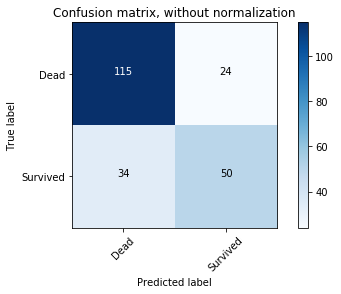

In [40]:
cnf_matrix = confusion_matrix(test_y['Survived'], knn_tuned.predict(test_x))
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']
# Plot non-normalized confusion matrix\n",
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
title='Confusion matrix, without normalization')

## Algorithm 6: Random Forest

In [42]:
# no parameter tuning
rfc = RandomForestClassifier()

rfc.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
accuracy_score(test_y['Survived'], rfc.predict(test_x))

0.8116591928251121

In [44]:
cv_score = cross_val_score(rfc, train_x, train_y, cv = 10, scoring='accuracy')
cv_score.mean()

0.7919945725915876

In [45]:
# tuning parameters for random forest
parameter_space =  {'n_estimators': [10, 50, 80], #default=10
            'criterion': ['gini', 'entropy'], #default=”gini”
            'max_depth': [2, 4, 6, 8, None], #default=None
            'oob_score': [True] #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            
             }
rf = RandomForestClassifier()
rf_tuned = GridSearchCV(rf, parameter_space, scoring = 'accuracy', cv=3)

In [46]:
rf_tuned.fit(train_x, train_y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 80], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, None], 'oob_score': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [47]:
# Best paramete set\n",
print('Best parameters found:\\n', rf_tuned.best_params_)

Best parameters found:\n {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 80, 'oob_score': True}


In [48]:
print(classification_report(test_y['Survived'], rf_tuned.predict(test_x)))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       139
           1       0.79      0.74      0.77        84

   micro avg       0.83      0.83      0.83       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



In [49]:
accuracy_score(test_y['Survived'], rf_tuned.predict(test_x))

0.8295964125560538

Confusion matrix, without normalization
[[123  16]
 [ 22  62]]


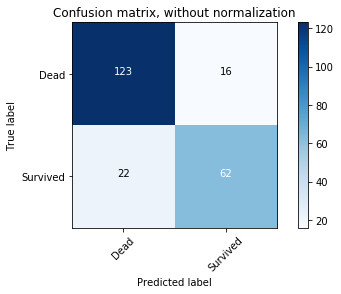

In [50]:
cnf_matrix = confusion_matrix(test_y['Survived'], rf_tuned.predict(test_x))
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']
# Plot non-normalized confusion matrix\n",
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
title='Confusion matrix, without normalization')

# Summary of Algorithm's Accuracy

In [67]:

columns = ['Algorithm Name', 'Accuracy Rate']

rows = [ ('Naive Bayes', accuracy_score(test_y['Survived'], gaussian.predict(test_x)) ) ,
             ('Multiple Layer Perceptron', 0.807175 ) ,
             ('XGBoost Classifier', accuracy_score(test_y['Survived'], xgb_tuned.predict(test_x)) ) ,
             ('Support Vector Machine', accuracy_score(test_y['Survived'], svm_tuned.predict(test_x)) ) ,
             ('KNN Classifier', accuracy_score(test_y['Survived'], knn_tuned.predict(test_x))) ,
             ('Random Forest Classifier', accuracy_score(test_y['Survived'], rf_tuned.predict(test_x)))  ]

Accuracy_compare = pd.DataFrame(rows, columns = columns)
Accuracy_compare

,Algorithm Name,Accuracy Rate
0,Naive Bayes,0.775785
1,Multiple Layer Perceptron,0.807175
2,XGBoost Classifier,0.834081
3,Support Vector Machine,0.730942
4,KNN Classifier,0.739910
5,Random Forest Classifier,0.829596


Text(0, 0.5, 'Algorithm')

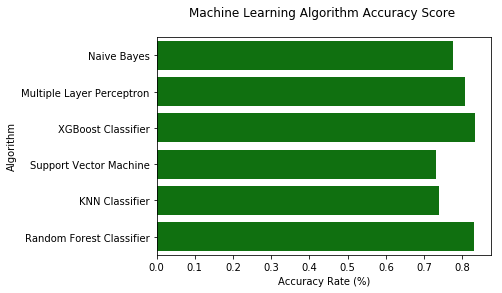

In [75]:
sns.barplot(x='Accuracy Rate', y = 'Algorithm Name', data = Accuracy_compare, color = 'green');

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Rate (%)')
plt.ylabel('Algorithm')

# Conclusion
Multiple Layer Perceptron, XGBoost Classifier and Random Forest Classifer clearly outperformed other algorithms

# Submission


In [84]:
# XGBoost submission

d = {'PassengerId':validation_set['PassengerId'],'Survived':xgb_tuned.predict(validation_set[x])}
df = pd.DataFrame(d)
df.to_csv('xgb.csv', columns=['PassengerId', 'Survived'], index=False)

In [85]:
# random forest submission
d = {'PassengerId':validation_set['PassengerId'],'Survived':rf_tuned.predict(validation_set[x])}
df = pd.DataFrame(d)
df.to_csv('rf.csv', columns=['PassengerId', 'Survived'], index=False)

In [100]:
# mlp submission
mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,20,20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

mlp.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [101]:

d = {'PassengerId':validation_set['PassengerId'],'Survived':mlp.predict(validation_set[x])}
df = pd.DataFrame(d)
df.to_csv('mlp.csv', columns=['PassengerId', 'Survived'], index=False)